In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
matplotlib.rcParams.update({'font.size': 16}) 

import numpy as np


In [6]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

In [7]:
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import LeakyReLU, ReLU, ELU
from tensorflow.keras.optimizers import SGD

In [8]:
from keras_tqdm import TQDMNotebookCallback

Using TensorFlow backend.


In [2]:
def gen_data(x):
    x0, x1, x2, x3, x4, x5, x6 = np.meshgrid(x, x, x, x, x, x, x)
    x0 = x0.ravel()
    x1 = x1.ravel()
    x2 = x2.ravel()
    x3 = x3.ravel()
    x4 = x4.ravel()
    x5 = x5.ravel()
    x6 = x6.ravel()
    z = np.sin(5 * x0) + .4 * np.sin(x1) + .2 * np.sin(x2) \
         + .9 * np.sin(x3) \
         + .3 * np.sin(x4) \
         + .1 * np.sin(x5) \
         + np.sin(x6)
    return x0, x1, x2, x3, x4, x5, x6, z

In [336]:
x = np.linspace(0, 1, 2)
x0, x1, x2, x3, x4, x5, x6, z = gen_data(x)
X = [x0, x1, x2, x3, x4, x5, x6]

In [337]:
x_val = np.linspace(0, 1, 3)
x0_val, x1_val, x2_val, x3_val, x4_val, x5_val, x6_val, z_val = gen_data(x_val)

X_val = [x0_val, x1_val, x2_val, x3_val, x4_val, x5_val, x6_val]

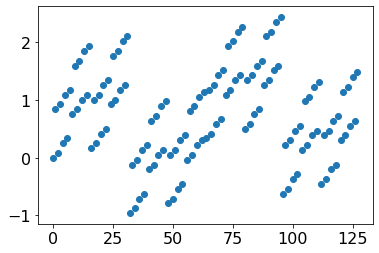

In [338]:
plt.figure()
plt.scatter(range(len(z)), z)

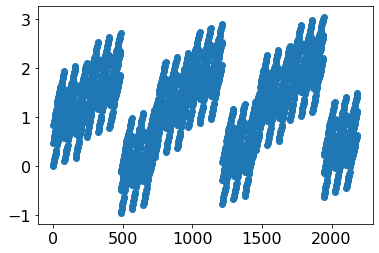

In [339]:
plt.figure()
plt.scatter(range(len(z_val)), z_val)

# fit with NN

In [340]:
X[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [341]:
# scale each dimension to be between ~ -1 and +1

# scale the training and the validation data: domain
x_scaler = []
x_scaled = []
xval_scaled = []
for i, xx in enumerate(X):
    x_scaler.append(StandardScaler())
    x_scaled.append(x_scaler[i].fit_transform(xx.reshape(-1,1)))
    xval_scaled.append(x_scaler[i].transform(X_val[i].reshape(-1,1)))
    
z_scaler = StandardScaler()
z_scaled = z_scaler.fit_transform(z.reshape(-1,1))
zval_scaled = z_scaler.transform(z_val.reshape(-1,1))


x_scaled = np.array(x_scaled)
xval_scaled = np.array(xval_scaled)

z_scaled = np.array(z_scaled)
zval_scaled = np.array(zval_scaled)


In [342]:
z_scaled

array([[-0.95350989],
       [ 0.12976613],
       [-0.84518229],
       [ 0.23809373],
       [-0.62852709],
       [ 0.45474894],
       [-0.52019948],
       [ 0.56307654],
       [ 0.02143853],
       [ 1.10471455],
       [ 0.12976613],
       [ 1.21304215],
       [ 0.34642133],
       [ 1.42969736],
       [ 0.45474894],
       [ 1.53802496],
       [-0.73685469],
       [ 0.34642133],
       [-0.62852709],
       [ 0.45474894],
       [-0.41187188],
       [ 0.67140414],
       [-0.30354428],
       [ 0.77973174],
       [ 0.23809373],
       [ 1.32136976],
       [ 0.34642133],
       [ 1.42969736],
       [ 0.56307654],
       [ 1.64635256],
       [ 0.67140414],
       [ 1.75468016],
       [-2.18799057],
       [-1.10471455],
       [-2.07966297],
       [-0.99638695],
       [-1.86300777],
       [-0.77973174],
       [-1.75468016],
       [-0.67140414],
       [-1.21304215],
       [-0.12976613],
       [-1.10471455],
       [-0.02143853],
       [-0.88805935],
       [ 0

In [343]:
np.mean(z)

0.7406707906398808

In [344]:
# they DONT have zero mean and unit std
print(np.mean(z))
print(np.std(z))


0.7406707906398808
0.7767835408103504


In [345]:
# they have zero mean and unit std
print(np.mean(z_scaled))
print(np.std(z_scaled))


-8.326672684688674e-17
1.0


In [346]:
# Initialising the ANN
model = Sequential()

# Adding the input layer and the first hidden layer
model.add(Dense(64, activation = 'relu', input_dim = 7))

# Adding the third hidden layer
model.add(Dense(units = 64, activation = 'relu'))

model.add(Dense(units = 64, activation = 'relu'))
# model.add(Dropout(0.5))

# Adding the output layer

model.add(Dense(units = 1))

#model.add(Dense(1))
# Compiling the ANN

opt = SGD(lr=0.01, momentum=0.9)
# opt = 'adam'
# loss = 'mean_absolute_error'
loss = 'mean_squared_error'
# loss = 'mean_absolute_percentage_error'
model.compile(loss=loss, optimizer=opt, metrics=['mse'])
# model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [347]:
x_scaled.reshape(7,-1).T.shape

(128, 7)

In [348]:
z_scaled.shape

(128, 1)

In [349]:
X_train = x_scaled.reshape(7,-1).T
y_train = z_scaled

X_val = xval_scaled.reshape(7,-1).T
y_val = zval_scaled

In [350]:
# Fitting the ANN to the Training set
history = model.fit(
    X_train,
    y_train,
    epochs = 100,
    batch_size = 100,
    verbose=0,
    validation_data=(X_val,y_val),
    callbacks=[TQDMNotebookCallback(leave_inner=False)]
);

In [351]:
history.history.keys()

dict_keys(['loss', 'mse', 'val_loss', 'val_mse'])

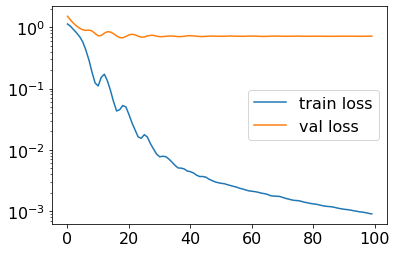

In [352]:
plt.figure()
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')

# plt.plot(history.history['mse'], label='train mse')
# plt.plot(history.history['val_mse'], label='val mse')

plt.yscale('log')

plt.legend()
plt.show()

In [353]:
_, train_acc = model.evaluate(X_train, y_train, verbose=0)
_, test_acc = model.evaluate(X_val, y_val, verbose=0)
print('Train: %.6f, Test: %.5f' % (train_acc, test_acc))

Train: 0.000882, Test: 0.71478


In [354]:
X_train.shape

(128, 7)

In [355]:
X_train[0].reshape(1,-1)

array([[-1., -1., -1., -1., -1., -1., -1.]])

In [356]:
# %%timeit
# pred_train = model.predict(X_train[0].reshape(1,-1))

In [357]:
pred_train = model.predict(X_train)
pred_val = model.predict(X_val)

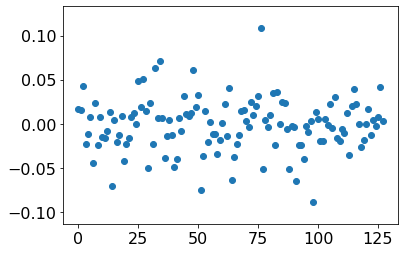

In [358]:
plt.figure()

plt.scatter(range(len(y_train)), pred_train - y_train)

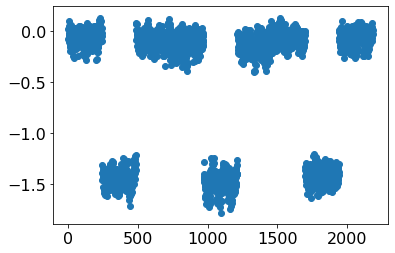

In [359]:
plt.figure()

plt.scatter(range(len(y_val)), pred_val - y_val)